The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[ 0.61415121  0.57274736  0.18062187  0.43276124  0.01579679  0.44617527
  0.24968435  0.12105358  0.53454836  0.39041234]
[ 10.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.]


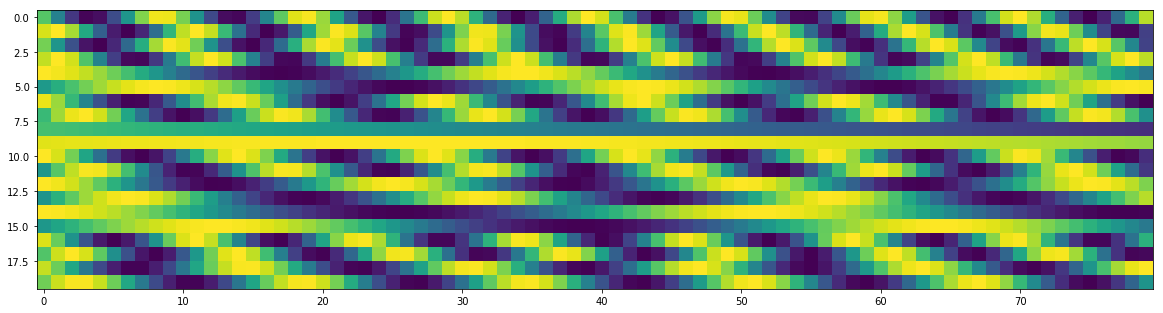

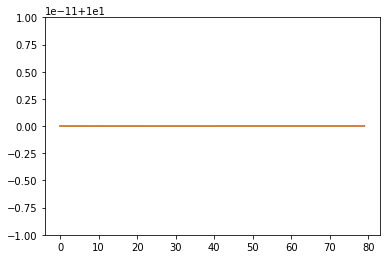

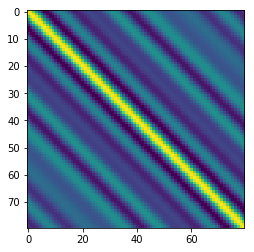

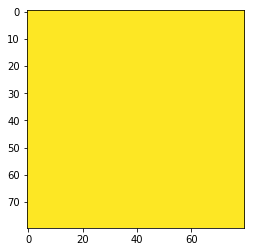

In [80]:
##### import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ortho_group
from scipy.stats import entropy
from scipy import sparse



%matplotlib inline
%load_ext autoreload
%autoreload 2

dx = 0.2
l  = 80
n  = 20



C = np.zeros((n,l))

def rot(theta):
    R = np.zeros((n,n))
    for i in np.arange(n, step=2):
        R[i:i+2,i:i+2] = [
            [np.cos(theta[i/2]), - np.sin(theta[i/2])],
            [np.sin(theta[i/2]),   np.cos(theta[i/2])]
        ]
    return R





theta = np.random.sample(n/2)*np.pi*.2
# theta = np.ones(n/2)*np.pi*.04


Q = ortho_group.rvs(n) 

# W = np.dot(np.dot(Q,rot(theta)),Q.T)
W = rot(theta)
# W = sparse.random(n,n,.12).A


# C[:,0] = np.dot(rot(np.linspace(0.,np.pi*2., num=n/2)),np.ones(n))

C[:,0] = np.random.rand(n)
for i in np.arange(n, step=2):
    C[i:i+2,0] = C[i:i+2,0]/np.sum(C[i:i+2,0]**2)**0.5

    
print theta
print np.sum(C**2, axis=0)
    
for i in range(1, l):
    C[:,i] = np.dot(W, C[:,i-1])


# C = C * (1 + np.random.sample((1,l))*4.5)


plt.figure(figsize=(20,20))
plt.imshow(C)
plt.show()


C_ = C - np.min(C, axis=0, keepdims=True) 
C_ = C_/np.max(C_, axis=0, keepdims=True)
C_ = C_/np.sum(C_, axis=0, keepdims=True)

# plt.plot([entropy(c) for c in C_.T] )
plt.plot(np.sum(C**2, axis=0) )
plt.plot(np.arange(l),np.ones(l)*np.sum(C[:,0]**2))
plt.show()

plt.imshow(np.dot(C.T,C))
plt.show()

plt.imshow( np.sum(C**2, axis=0, keepdims=True).T + np.sum(C**2, axis=0, keepdims=True), vmin=0)
